In [ ]:
from sklearn.datasets import make_classification

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                                                  n_classes=3, n_clusters_per_class=1, random_state=0)

> make_classification함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령이다. 이 함수의 인수와 반환값은 다음과 같다.
* n_samples : 표본 데이터의 수, 디폴트 100
* n_features : 독립 변수의 수, 디폴트 20
* n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
* n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
* n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
* n_classes : 종속 변수의 클래스 수, 디폴트 2
* n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
* weights : 각 클래스에 할당된 표본 수
* random_state : 난수 발생 시드
* 반환값:
* * X : [n_samples, n_features] 크기의 배열, 독립 변수
* * y : [n_samples] 크기의 배열,종속 변수

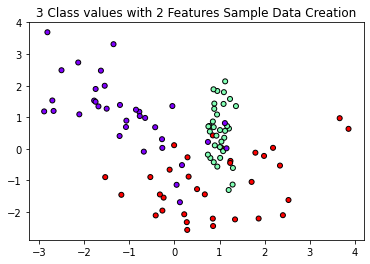

In [ ]:
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample Data Creation")

# 그래프 형태로 2개의 피쳐로 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor = 'k', cmap='rainbow')

In [ ]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'clim'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning

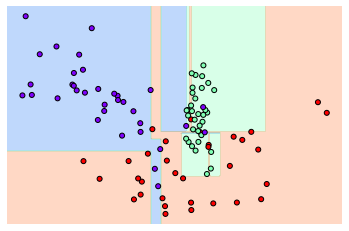

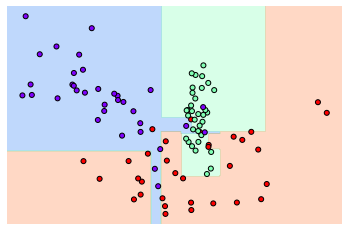

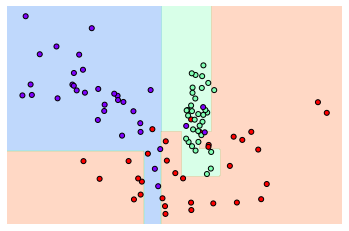

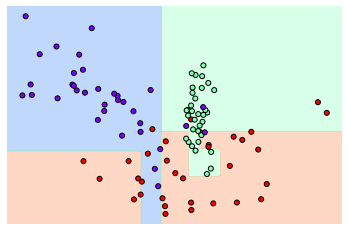

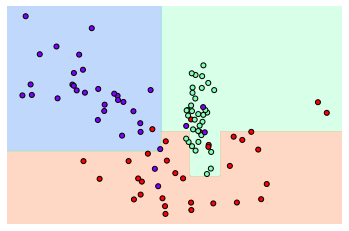

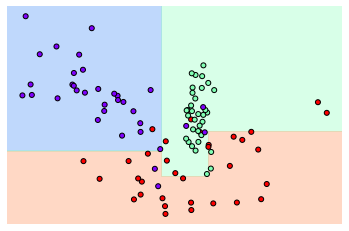

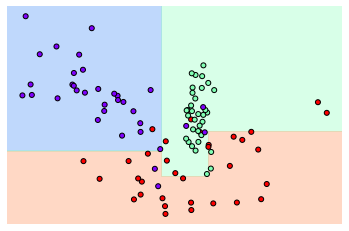

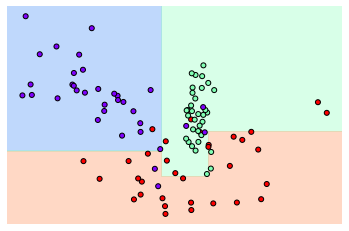

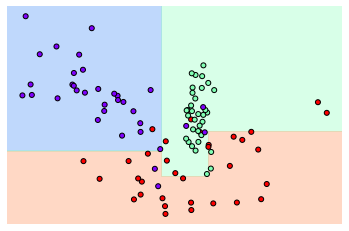

In [ ]:
import time

for i in range(1, 10):
  # min_samples_leaf = 6 으로 설정한 Decision Tree의 학습과 결정 경계 시각화
  dt_clf = DecisionTreeClassifier(min_samples_leaf=i).fit(X_features, y_labels)
  visualize_boundary(dt_clf, X_features, y_labels)